In [154]:
#1. Preprocessing phase.
import pandas as pd
import numpy as np
#After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.
df = pd.read_csv("titanic-passengers.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [155]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [156]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [157]:
print(df['Survived'].value_counts())

No     549
Yes    342
Name: Survived, dtype: int64


In [158]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [159]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [160]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [161]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
df.iloc[3]

PassengerId                                            568
Survived                                                No
Pclass                                                   3
Name           Palsson, Mrs. Nils (Alma Cornelia Berglund)
Sex                                                 female
Age                                                   29.0
SibSp                                                    0
Parch                                                    4
Ticket                                              349909
Fare                                                21.075
Cabin                                                  NaN
Embarked                                                 S
Name: 3, dtype: object

In the above fields I have shown some valuable interformation about this dataset:
- It consists of 12 columns and 891 rows
- The data consists of integers, floats, and objects. 
- The feature Pclass ranges between 1 and 3, with only 25% of the passengers sitting in the 2nd and 1st class. 
- The youngest passenger is less than a year old, while the oldest passenger is 80, with average age at 29.7. 75% of the passengers is below the age of 38. 
- 75% of the passengers brought only 1 sibling or spouse with them on the trip, and almost none of the passengers brought any children or parents with them. 
- 75% of the tickets cost below 31 pounds, while the remaining tickets can cost up to 512 pounds. 
- of the 891 passengers, 549 died during accident, while 342 survived. 
- 577 of the passengers were men, while 314 passengers were women.

In [163]:
#As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [164]:
df.isnull().sum().sum()

866

In [165]:
df.Age.mean()

29.69911764705882

In [166]:
df.Age.mode()

0    24.0
dtype: float64

In [167]:
df.Age.median()

28.0

In [168]:
df.Age = df.Age.fillna(df.Age.median())
df.Age

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889    28.0
890    19.0
Name: Age, Length: 891, dtype: float64

In [169]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [170]:
df.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


In [171]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [172]:
df.Age = df.Age.fillna(df.Age.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


In [173]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [174]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [175]:
df['Embarked'].fillna('S', inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


In [176]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [177]:
df.isnull().sum().sum()

0

In [178]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


I can now confirm that all the missing values have either been filled in, or have been removed


In [179]:
#to turn categorial values into numerical values
#Survived. No = 0 and Yes = 1
num_survived = {'Survived':{'No':0, 'Yes':1}}
df.replace(num_survived, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


In [180]:
#Sex. male = 0 and female = 1
num_sex = {'Sex':{'male':0, 'female':1}}
df.replace(num_sex, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,S


In [181]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [182]:
Embarked_one_hot = pd.get_dummies(df['Embarked'])
df = df.join(Embarked_one_hot)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,C,1,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,S,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,S,0,0,1


In [183]:
df = df.drop('Embarked', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,1,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,0,0,1


In [184]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
C                uint8
Q                uint8
S                uint8
dtype: object

In [185]:
df = df.drop('Ticket', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,7.2292,1,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,8.6625,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,7.8958,0,0,1


In [186]:
df = df.drop('PassengerId', axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0,0,1
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0,0,1
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0,0,1
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0,0,1
4,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1,0,0
887,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,7.2292,1,0,0
888,0,3,"Cacic, Miss. Marija",1,30.0,0,0,8.6625,0,0,1
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,7.8958,0,0,1


In [187]:
#Your task now is to create a new column called Title which contains the appropriate Title for each individual ( hint: extract the title from the column Names)
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.')
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Mrs','Officer','Officer','Royalty','Royalty','Royalty','Officer','Officer','Officer','Royalty','Royalty'],inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0,0,1,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0,0,1,Mr
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0,0,1,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0,0,1,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1,0,0,Mrs
887,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,7.2292,1,0,0,Mr
888,0,3,"Cacic, Miss. Marija",1,30.0,0,0,8.6625,0,0,1,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,7.8958,0,0,1,Mr


In [188]:
df = df.drop('Name', axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mr
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mr
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mr
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,1,0,0,Mrs
887,0,3,0,22.0,0,0,7.2292,1,0,0,Mr
888,0,3,1,30.0,0,0,8.6625,0,0,1,Miss
889,0,3,0,28.0,0,0,7.8958,0,0,1,Mr


In [189]:
print(df['Title'].value_counts())

Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


After having replaced the categorical data with numerical data, and after having removed all the unnecesary columns, I have verified that the data is now ready to be treated. 

C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


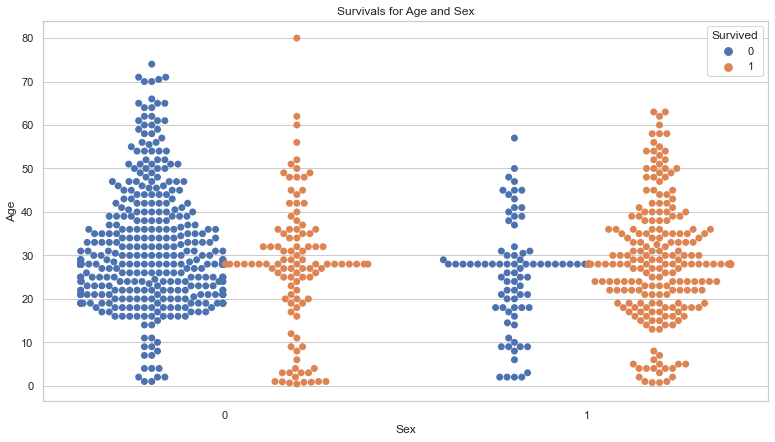

In [190]:
#Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

#Sex. male = 0 and female = 1
#Survived. No = 0 and Yes = 1
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Sex', y='Age', hue='Survived', split=True, data=df, size=7, ax=ax)
plt.title('Survivals for Age and Sex')
plt.show()

C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cees Roffelson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.0% of the points cannot b

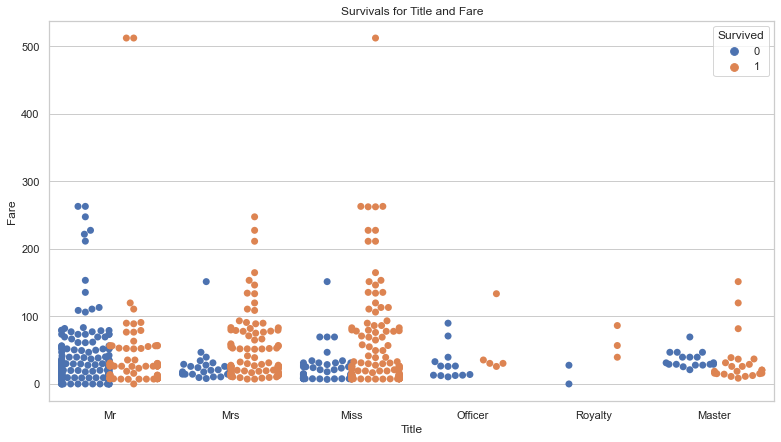

In [191]:
#Pick two other features and study their impact on the survival of the individuals.
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Title', y='Fare', hue='Survived', split=True, data=df, size=7, ax=ax)
plt.title('Survivals for Title and Fare')
plt.show()


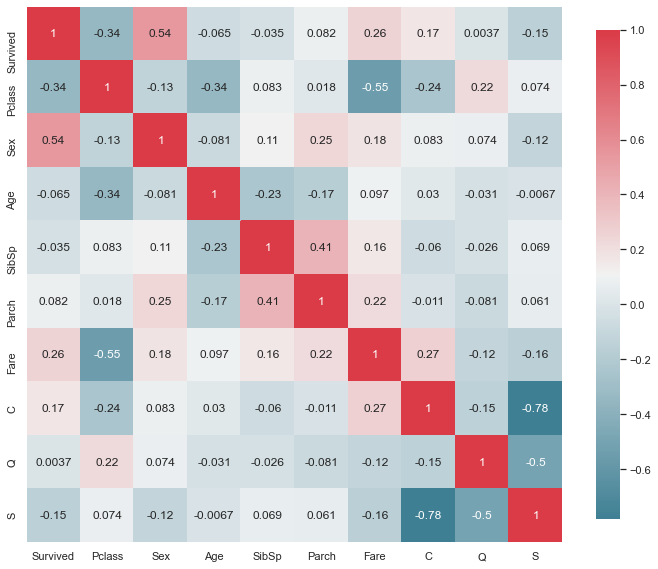

In [192]:

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

With this scatterplot we can analyze whether there is a correlation between the various features in the dataset. We can see that there is a strong relation between the survival rate, and the Pclass, Sex, and Fare features, with Sex having the strongest influence on the survival rate. It shows that, the higher the price of your ticket was, or the 'higher' your class was, the bigger you chances of survival were. In addition, women had a much higher chance of survival than men. 

With the feature Pclass, we can see there is a strong relation with the Age and Fare features; the 'higher' your class, the more expensive your fare was likely to be, and older people were more likely to book a ticket in a 'higher' class.

With feature Sex, we can see again the strong relation with the survival rate, but also with Parch; if the passenger is a women, the chance is much higher she will have brought children or parents with her. 

Age only has a meaningful relation with the Sibsp, Parch, and Pclass features; the older a passenger was, the fewer siblings, spouses, parents, or children he/she was likely to bring with. In addition, an older passenger was likelier to stay in a 'higher' class. 

The SibSp feature has a meaningful relation with the Age, Parch, Sex, and Fare features. The more siblings or spouses a passenger had, the younger he/she was likely to be, the more parents or children he/she  brought with her as well, and the more likely it would be for his/her ticket to be more expensive. In addition, women were more likely to bring siblings or spouses with them. 

The Parch feature has a meaningful relation with the Sex, Age, SibSp, and Fare features. The more parents or children a passenger brought with him/her, the more likely she was a woman. The younger passengers were, the more likely they brought parents/children with them. Candidates with Parents and children also likely brought their siblings and spouses with them, and they paid more for their tickets. 

The feature Fare has a meaningful relation with the S, Q, C, Parch, SibSp, Pclass, Sex, and Survived features. Passengers who embarked at Cherbourg most likely paid significantly more than those that embarked at Queenstown or Southhampton. Passengers who brought siblings, spouses, parents, or children with them, very likely had to pay more for their tickets. There is a strong indication that passengers who booked into a 'higher' class, also had to pay more for their tickets. If the passenger was a woman, she most likely had to pay more for her tickets. And passengers who paid more for their ticket had a significantly bigger chance of survival than passengers who paid less. 

The feature C has a meaningful relation with the features Fare, Pclass, and Survived. Passengers who boarded at Cherbourg, paid more for their tickets, likely stayed in a 'higher' class, and a bigger chance of survival, than those that boarded at Southhampton or Queenstown. 

The feature Q has a meaningful relation with the features Fare and Pclass. Passengers that boarded at Queenstown were more likely to stay in a 'lower' class, and likely paid less than candidates who boarded at at Cherbourg. 

The feature S has a meaningful relation with the features Fare, Sex, and Survived. Passengers that boarded at Southampton were more likely to be men, more likely to not survive, and more likely paid less for their tickets, than passengers who boarded at either Queenstown or Cherbourg. 


In [193]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
df[["Survived", "Pclass"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


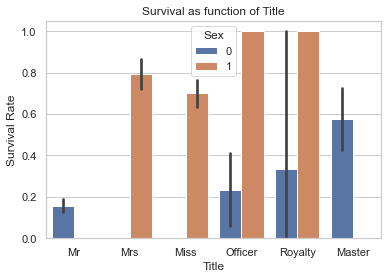

In [205]:
#Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)
sns.barplot(x='Title', y='Survived', hue='Sex', data=df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()


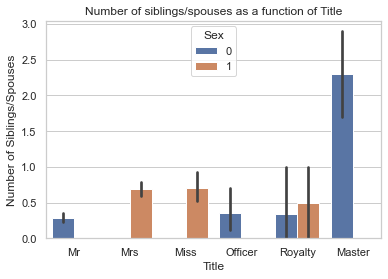

In [212]:
sns.barplot(x='Title', y='SibSp', hue='Sex', data=df)
plt.ylabel("Number of Siblings/Spouses")
plt.title("Number of siblings/spouses as a function of Title")
plt.show()

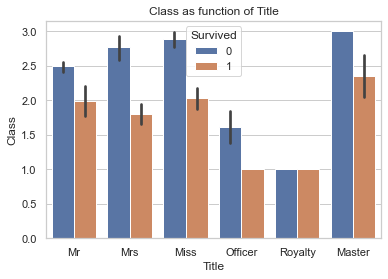

In [209]:
sns.barplot(x='Title', y='Pclass', hue='Survived', data=df)
plt.ylabel("Class")
plt.title("Class as function of Title")
plt.show()

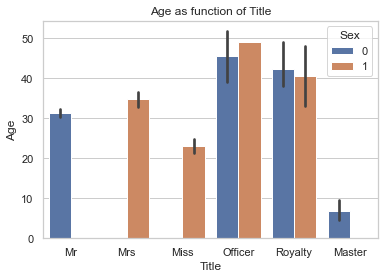

In [211]:
sns.barplot(x='Title', y='Age', hue='Sex', data=df)
plt.ylabel("Age")
plt.title("Age as function of Title")
plt.show()

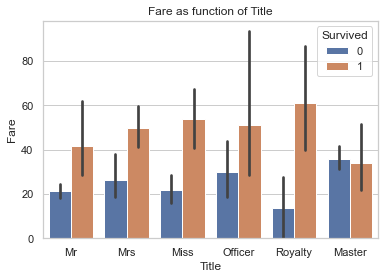

In [213]:
sns.barplot(x='Title', y='Fare', hue='Survived', data=df)
plt.ylabel("Fare")
plt.title("Fare as function of Title")
plt.show()

In [199]:
#Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.
for dataset in [df]:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] +1
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title,Familysize
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mr,1
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mr,1
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mr,1
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs,5
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,1,0,0,Mrs,2
887,0,3,0,22.0,0,0,7.2292,1,0,0,Mr,1
888,0,3,1,30.0,0,0,8.6625,0,0,1,Miss,1
889,0,3,0,28.0,0,0,7.8958,0,0,1,Mr,1


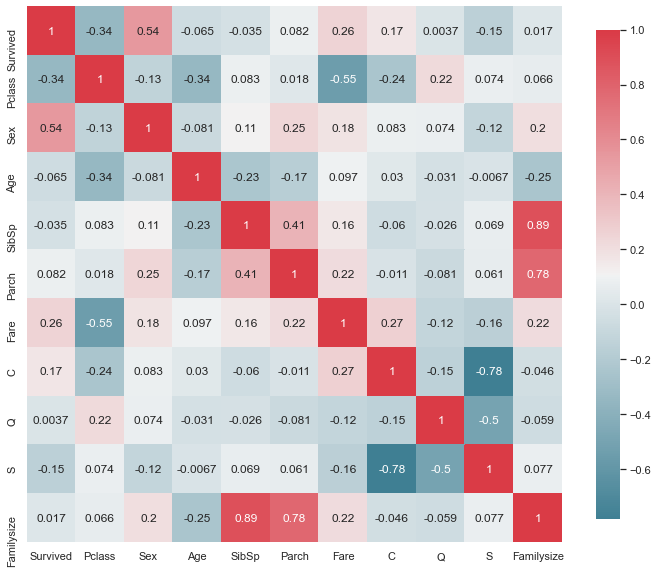

In [200]:
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
#Use what you have learned so far to conclude if this feature is useful or not.



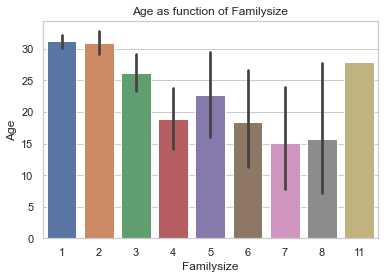

In [231]:
sns.barplot(x='Familysize', y='Age', data=df)
plt.ylabel("Age")
plt.title("Age as function of Familysize")
plt.show()

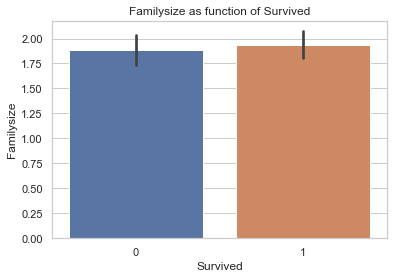

In [236]:
sns.barplot(x='Survived', y='Familysize', data=df)
plt.ylabel("Familysize")
plt.title("Familysize as function of Survived")
plt.show()

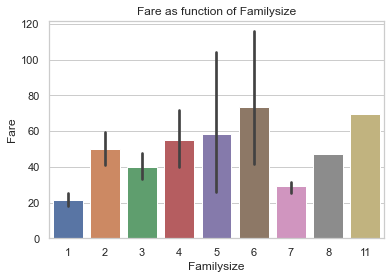

In [222]:
sns.barplot(x='Familysize', y='Fare', data=df)
plt.ylabel("Fare")
plt.title("Fare as function of Familysize")
plt.show()

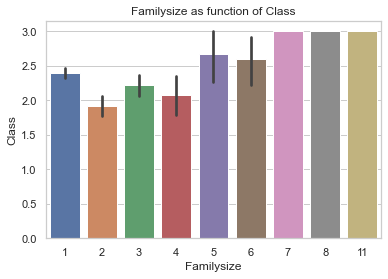

In [229]:
sns.barplot(x='Familysize', y='Pclass', data=df)
plt.ylabel("Class")
plt.title("Class as function of Familysize")
plt.show()

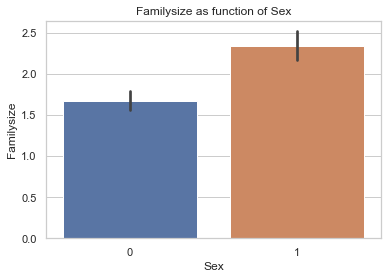

In [227]:
sns.barplot(x='Sex', y='Familysize', data=df)
plt.ylabel("Familysize")
plt.title("Familysize as function of Sex")
plt.show()

The scatterplot shows us that the new Familysize feature has a meaningful relationship with the Sex, Fare, and Age features; Women were more likely to be joined by at least 1 other person, whereas men most often were travelling alone. With Fare the relationship is not entirely linear, as a bigger family does not always lead to a higher ticket price. This could partially be explained by the fact that bigger families (5+ members) were more likely to stay in the 3rd class than smaller families. Passengers with bigger families were more likely to be younger. 

Familysize does not appear to have a meaningful relationship with the survival rate of the passengers. 

In conclusion: the feature of familysize is useful in helping us understand more about the context of passengers of different ages, sex, and in different classes. However, it bears no meaningful relationship to the survival rate of the passengers, and is thus not useful for analyzing that. 